In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from biosppy.signals import ecg

In [2]:
signal = np.loadtxt('../examples/ecg.txt')

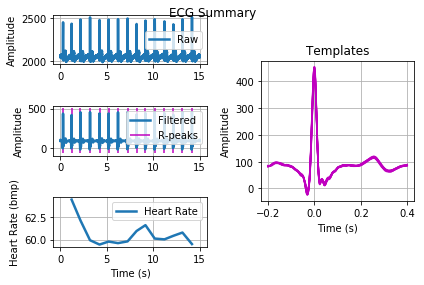

In [3]:
out = ecg.ecg(signal)

In [4]:
from biosppy.signals import resp

In [5]:
respsignal = np.loadtxt('../examples/resp.txt')

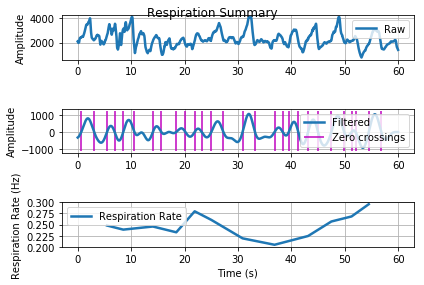

In [6]:
out = resp.resp(respsignal)

In [7]:
from biosppy.signals import bvp

In [8]:
ppgsignal = np.loadtxt('../examples/bvp.txt')

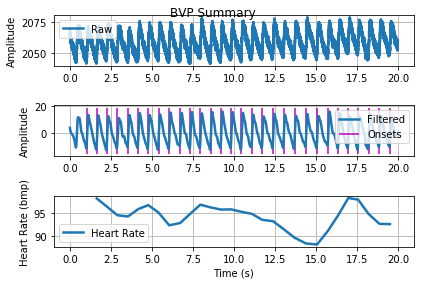

In [9]:
out = bvp.bvp(ppgsignal)

In [10]:
from biosppy.signals import tools as st

In [11]:
sampling_rate = 1000
sampling_rate = float(sampling_rate)
order = int(0.3 * sampling_rate)
filtered, _, _ = st.filter_signal(signal=signal,
                                  ftype='FIR',
                                  band='bandpass',
                                  order=order,
                                  frequency=[3, 45],
                                  sampling_rate=sampling_rate)

(0, 2000)

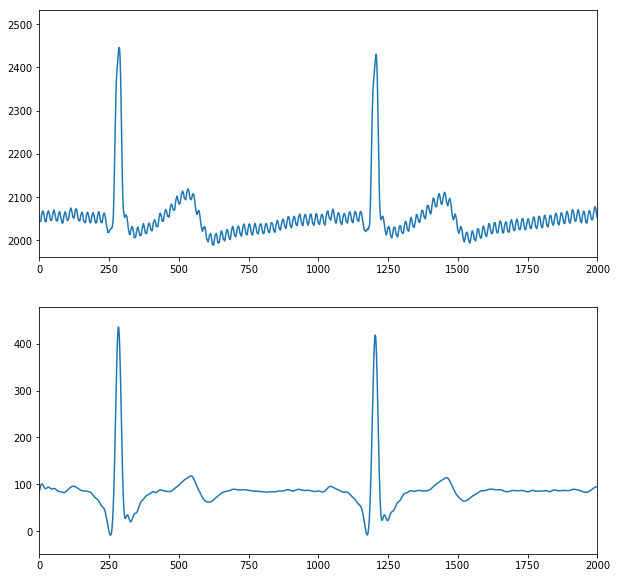

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(signal)
ax[0].set_xlim([0, 2000])
ax[1].plot(filtered)
ax[1].set_xlim([0, 2000])

In [13]:
rpeaks, = ecg.hamilton_segmenter(signal=filtered, sampling_rate=sampling_rate)

(0, 4000)

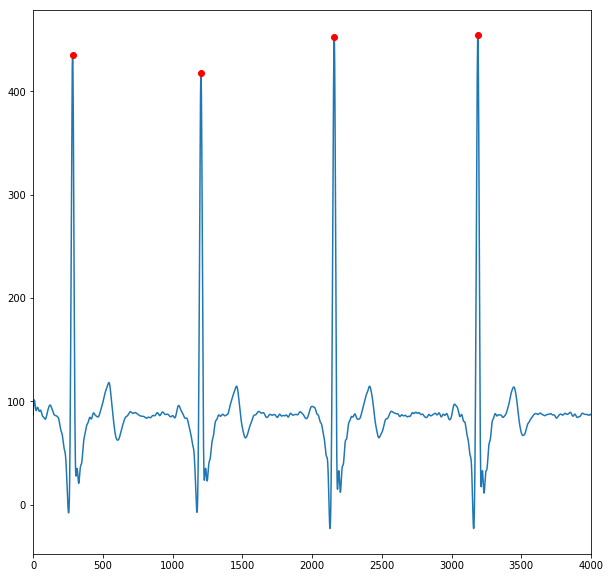

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(filtered)
ax.plot(rpeaks, filtered[rpeaks], 'ro')
ax.set_xlim([0, 4000])

In [15]:
rpeaks, = ecg.correct_rpeaks(signal=filtered,
                             rpeaks=rpeaks,
                             sampling_rate=sampling_rate,
                             tol=0.05)

(0, 4000)

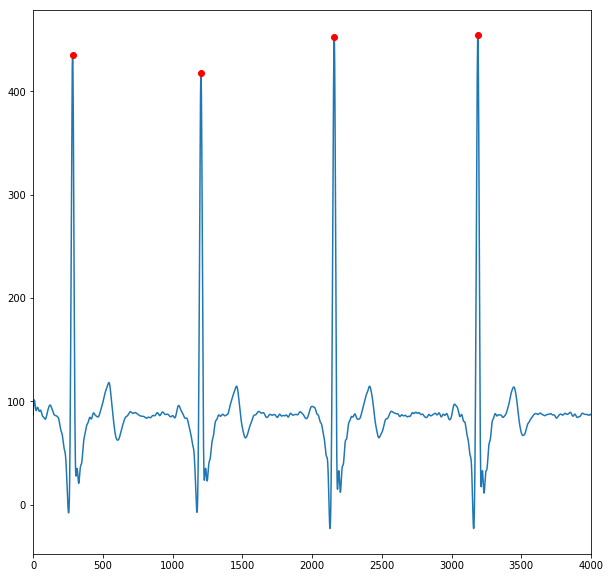

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(filtered)
ax.plot(rpeaks, filtered[rpeaks], 'ro')
ax.set_xlim([0, 4000])